# <font color = 'red'>Creating a Movie Recommendation System

# Step 0: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


import surprise
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise import Dataset, Reader, NormalPredictor, KNNBasic

from surprise import NMF, SVD, SVDpp, KNNWithMeans, KNNWithZScore, CoClustering
from surprise.model_selection import cross_validate


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors


%matplotlib inline

import sklearn
import sklearn as tree
import sklearn as preprocessing

import math
import warnings
import scipy as sp 

from numpy import *
from sklearn.model_selection import train_test_split

# Step 1: Read the Data

In [2]:
anime = pd.read_csv('anime1.csv')
rating = pd.read_csv('rating.csv')

In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [8]:
anime.iloc[1]

anime_id                                                 5114
name                         Fullmetal Alchemist: Brotherhood
genre       Action, Adventure, Drama, Fantasy, Magic, Mili...
type                                                       TV
episodes                                                   64
rating                                                   9.26
members                                                793665
Name: 1, dtype: object

In [9]:
rating.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

# Merge datasets by joining both the datasets.

In [10]:
df3 = pd.merge(anime, rating)
df3

C:\Users\noraa\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,anime_id,name,genre,type,episodes,rating,members,user_id
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,1418
1,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,1798
2,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,2072
3,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,2533
4,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,4985
...,...,...,...,...,...,...,...,...
7397,4541,Vicious,Hentai,OVA,2,6.0,1073,66049
7398,4541,Vicious,Hentai,OVA,2,6.0,1073,69076
7399,5545,Heisei Jogakuen Kagai Lesson,Hentai,OVA,1,5.0,503,20171
7400,5545,Heisei Jogakuen Kagai Lesson,Hentai,OVA,1,5.0,503,58567


In [11]:
df3.shape

(7402, 8)

# Step 2: Data Cleaning

In [12]:
df3['name'] = df3 ['name'].map(lambda x: x.lstrip('+-?°#&').rstrip('aAbBcC'))

In [13]:
col = df3['name'].tolist()
col

['City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City Hunter',
 'City H

In [14]:
df3.drop_duplicates(subset=['name'], keep='first', inplace=True, ignore_index=False)

In [15]:
df3.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
user_id     0
dtype: int64

In [16]:
df3.isna().any()

anime_id    False
name        False
genre       False
type        False
episodes    False
rating      False
members     False
user_id     False
dtype: bool

In [17]:
df3.isna()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,False,False,False,False,False,False,False,False
130,False,False,False,False,False,False,False,False
460,False,False,False,False,False,False,False,False
961,False,False,False,False,False,False,False,False
1018,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7358,False,False,False,False,False,False,False,False
7375,False,False,False,False,False,False,False,False
7391,False,False,False,False,False,False,False,False
7399,False,False,False,False,False,False,False,False


In [18]:
df3.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
user_id     0
dtype: int64

In [19]:
df3.isna().any().sum()

0

In [20]:
anime.genre = anime.genre.str.split('|')
anime.genre

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12294, dtype: object

In [21]:
df3.describe()

,anime_id,rating,members,user_id
count,83.000000,83.000000,83.000000,83.000000
mean,12158.662651,6.469880,11762.927711,12732.542169
std,10742.300630,1.085799,22293.151706,17513.266469
min,124.000000,2.000000,50.000000,17.000000
25%,2771.500000,6.000000,669.500000,876.500000
50%,8275.000000,7.000000,2437.000000,4391.000000
75%,20692.000000,7.000000,12011.500000,20497.500000
max,33546.000000,8.000000,121722.000000,65836.000000


# <font color="black"> EDA

C:\Users\noraa\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


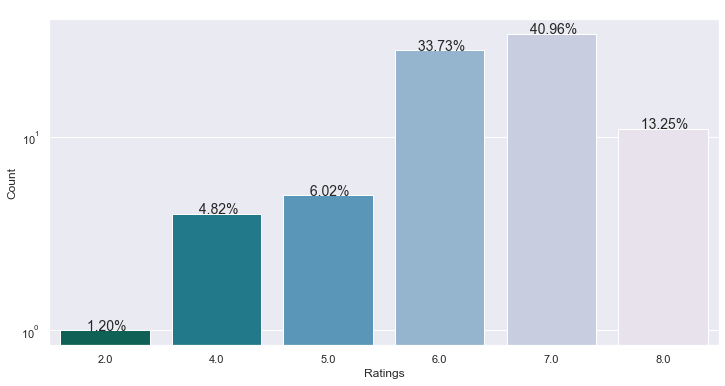

In [22]:
def n (serie):
    ax = sns.countplot(serie)
    total_count = serie.count()

    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'\n{percentage: .2f}%',
                    (x.mean(), y), ha='center', size=14)

sns.set_theme(style='darkgrid', palette = 'PuBuGn_r')
plt.figure(figsize=(12, 6))
plt.axes(yscale="log")

n (df3.rating)

plt.ylabel("Count")
plt.xlabel("Ratings");

In [23]:
df3.groupby('name')['rating'].mean().head()

name
001                                        4.0
Accelerando: Datenshi-tachi no Sasayaki    7.0
Alps no Shoujo Heidi (1979)                7.0
Aoi Blink                                  7.0
Aoi Sekai no Chuushin de                   6.0
Name: rating, dtype: float64

In [24]:
df3.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
Kamisama Hajimemashita OV            8.0
Maria-sama ga Miteru 3rd             8.0
Mobile Suit Gundam Thunderbolt       8.0
City Hunter                          8.0
Gekkan Shoujo Nozaki-kun Specials    8.0
Name: rating, dtype: float64

In [25]:
df3.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
001                                        1
Shin Onimusha: Dawn of Dreams the Story    1
Sex Pistols                                1
Sekai de Ichiban Tsuyoku Naritai!          1
Sekai Kei Sekai Ron                        1
Name: rating, dtype: int64

In [26]:
ratings_mean_count = pd.DataFrame(df3.groupby('name')['rating'].mean())

In [27]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df3.groupby('name')['rating'].count())

In [28]:
ratings_mean_count.head()

,rating,rating_counts
name,,
001,4.0,1
Accelerando: Datenshi-tachi no Sasayaki,7.0,1
Alps no Shoujo Heidi (1979),7.0,1
Aoi Blink,7.0,1
Aoi Sekai no Chuushin de,6.0,1


<AxesSubplot:xlabel='name'>

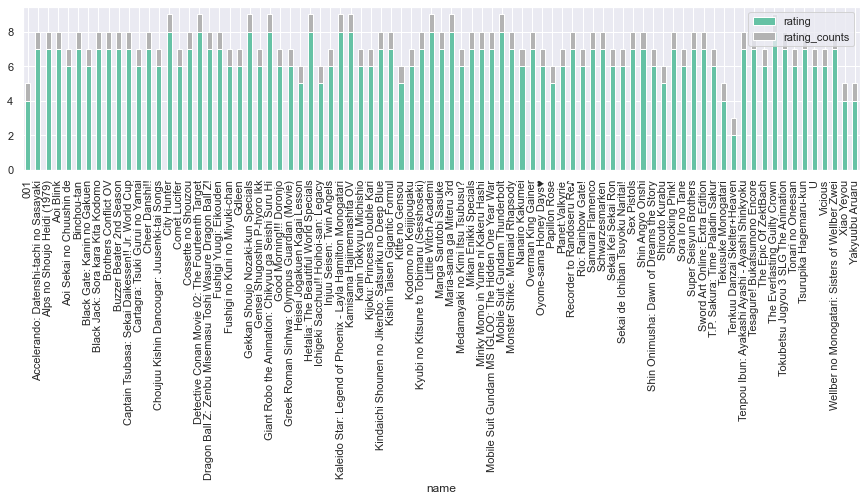

In [29]:
# Target variable
ratings_mean_count.plot(kind='bar', figsize=[15,3], stacked=True, colormap='Set2')

C:\Users\noraa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


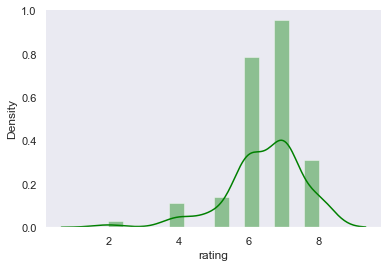

In [30]:
sns.set_style('dark')
sns.distplot(ratings_mean_count['rating'], color='g')
sns.despine(left=True)

In [31]:
df3[df3['rating'] == df3['rating'].max()]

,anime_id,name,genre,type,episodes,rating,members,user_id
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.0,19963,1418
130,780,Detective Conan Movie 02: The Fourteenth Target,"Adventure, Comedy, Mystery, Police, Shounen",Movie,1,8.0,26284,415
460,27633,Gekkan Shoujo Nozaki-kun Specials,"Comedy, Romance, School",Special,6,8.0,52672,123
961,2321,Giant Robo the Animation: Chikyuu ga Seishi Su...,"Action, Mecha, Sci-Fi, Shounen, Super Power",OVA,7,8.0,12283,4391
1018,17273,Hetalia: The Beautiful World Specials,"Comedy, Historical, Parody",Special,4,8.0,8644,1457
1064,429,Kaleido Star: Legend of Phoenix - Layla Hamilt...,"Comedy, Drama, Shoujo",OVA,1,8.0,9268,1497
1198,18661,Kamisama Hajimemashita OV,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,2,8.0,38678,120
1449,14349,Little Witch Academi,"Adventure, Comedy, Fantasy, Magic, School",Movie,1,8.0,111703,111
2657,1729,Maria-sama ga Miteru 3rd,"Drama, School, Shoujo Ai, Slice of Life",OVA,5,8.0,12394,916
2795,31973,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space",ONA,4,8.0,14419,497


# Top average rating of anime

In [32]:
movies_average_rating = df3.groupby('name')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,name,Average Rating
0,Kamisama Hajimemashita OV,8.0
1,Maria-sama ga Miteru 3rd,8.0
2,Mobile Suit Gundam Thunderbolt,8.0
3,City Hunter,8.0
4,Gekkan Shoujo Nozaki-kun Specials,8.0


In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movies_average_rating['Average Rating'].describe())

count   83.000
mean     6.470
std      1.086
min      2.000
25%      6.000
50%      7.000
75%      7.000
max      8.000
Name: Average Rating, dtype: float64


In [34]:

#Restrict to the top 5 Anime
df3.name.value_counts()

City Hunter                                             1
Kyubi no Kitsune to Tobimaru (Sesshoseki)               1
Good Morning!!! Doronjo                                 1
Gensei Shugoshin P-hyoro Ikk                            1
Choujuu Kishin Dancougar: Juusenki-tai Songs            1
                                                       ..
Minky Momo in Yume ni Kakeru Hashi                      1
Manga Sarutobi Sasuke                                   1
Kishin Taisen Gigantic Formul                           1
Kindaichi Shounen no Jikenbo: Satsuriku no Deep Blue    1
Shirouto Kurabu                                         1
Name: name, Length: 83, dtype: int64

In [35]:
n = 5
top_anime = df3.name.value_counts().index[:n]

dfn = df3[df3['name'].isin(top_anime)]
dfn.head()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.000,19963,1418
6999,17002,Choujuu Kishin Dancougar: Juusenki-tai Songs,"Action, Mecha, Sci-Fi, Shounen",OVA,1,6.000,143,23395
7001,2691,Gensei Shugoshin P-hyoro Ikk,"Adventure, Fantasy",Movie,1,6.000,150,53935
7002,31699,Good Morning!!! Doronjo,"Comedy, Parody",TV,225,6.000,135,53465
7004,17673,Kyubi no Kitsune to Tobimaru (Sesshoseki),"Demons, Fantasy",Movie,1,7.000,114,42635


# Total ratings and numbers of users and anime name from the dataset.

In [36]:
display(dfn.sample(5, random_state=8))

print(f"""Number of total ratings: {df3.shape[0]}. 
Number of different users: {df3.user_id.nunique()}. 
Number of different animes: {df3.anime_id.nunique()}.""")

,anime_id,name,genre,type,episodes,rating,members,user_id
7004,17673,Kyubi no Kitsune to Tobimaru (Sesshoseki),"Demons, Fantasy",Movie,1,7.000,114,42635
7001,2691,Gensei Shugoshin P-hyoro Ikk,"Adventure, Fantasy",Movie,1,6.000,150,53935
6999,17002,Choujuu Kishin Dancougar: Juusenki-tai Songs,"Action, Mecha, Sci-Fi, Shounen",OVA,1,6.000,143,23395
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.000,19963,1418
7002,31699,Good Morning!!! Doronjo,"Comedy, Parody",TV,225,6.000,135,53465


Number of total ratings: 83. 
Number of different users: 80. 
Number of different animes: 83.


 # Getting number of users and anime from the dataset.


In [37]:

anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')


user_id = rating.user_id.unique().tolist()
name = anime.name.unique().tolist()
print('Number of Users: {}'.format(len(user_id)))
print('Number of Anime Name: {}'.format(len(name)))

Number of Users: 73515
Number of Anime Name: 12292


# Collaborative Filtering

In [38]:
ratings_pivot = df3.pivot_table(values = 'rating', index = 'name', columns = 'user_id')
ratings_pivot.head(2)

user_id,17,29,43,77,111,120,123,201,222,247,...,41510,42635,47282,47652,48805,49662,53465,53492,53935,65836
name,,,,,,,,,,,,,,,,,,,,,
001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accelerando: Datenshi-tachi no Sasayaki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ratings_pivot.fillna(0, inplace = True)

In [40]:
ratings_pivot.head(2)

user_id,17,29,43,77,111,120,123,201,222,247,...,41510,42635,47282,47652,48805,49662,53465,53492,53935,65836
name,,,,,,,,,,,,,,,,,,,,,
001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Accelerando: Datenshi-tachi no Sasayaki,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
#anime name
anime_name = ratings_pivot.index
anime_name

Index(['001', 'Accelerando: Datenshi-tachi no Sasayaki',
       'Alps no Shoujo Heidi (1979)', 'Aoi Blink', 'Aoi Sekai no Chuushin de',
       'Binchou-tan', 'Black Gate: Kanin no Gakuen',
       'Black Jack: Sora kara Kita Kodomo', 'Brothers Conflict OV',
       'Buzzer Beater 2nd Season',
       'Captain Tsubasa: Sekai Daikessen!! Jr. World Cup',
       'Cartagra: Tsuki Gurui no Yamai', 'Cheer Danshi!!',
       'Choujuu Kishin Dancougar: Juusenki-tai Songs', 'City Hunter',
       'Comet Lucifer', 'Cossette no Shouzou',
       'Detective Conan Movie 02: The Fourteenth Target',
       'Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z!',
       'Fushigi Yuugi: Eikouden', 'Fushigi no Kuni no Miyuki-chan', 'Gdleen',
       'Gekkan Shoujo Nozaki-kun Specials', 'Gensei Shugoshin P-hyoro Ikk',
       'Giant Robo the Animation: Chikyuu ga Seishi Suru Hi',
       'Good Morning!!! Doronjo',
       'Greek Roman Sinhwa: Olympus Guardian (Movie)',
       'Heisei Jogakuen Kagai Lesson', 'He

In [42]:
# correlation  
corr_matrix = np.corrcoef(ratings_pivot)
corr_matrix

array([[ 1.        , -0.01265823, -0.01265823, ..., -0.01265823,
        -0.01265823, -0.01265823],
       [-0.01265823,  1.        , -0.01265823, ..., -0.01265823,
        -0.01265823, -0.01265823],
       [-0.01265823, -0.01265823,  1.        , ..., -0.01265823,
        -0.01265823, -0.01265823],
       ...,
       [-0.01265823, -0.01265823, -0.01265823, ...,  1.        ,
        -0.01265823, -0.01265823],
       [-0.01265823, -0.01265823, -0.01265823, ..., -0.01265823,
         1.        , -0.01265823],
       [-0.01265823, -0.01265823, -0.01265823, ..., -0.01265823,
        -0.01265823,  1.        ]])

In [43]:
def recommender(anime_names):  
    recommendations = corr_matrix.shape[0]
    for movie in anime_names:
        recommendations = recommendations + corr_matrix[list(name).index(name)]
    recommendations_df = pd.DataFrame({'name': name,'Recommendation': recommendations})
    recommendations_df = recommendations_df[~(recommendations_df.name.isin(anime_names))]
    recommendations_df = recommendations_df.sort_values(by=['Recommendation'], ascending = False)
    return recommendations_df


In [44]:
user = 1

user_movies = df3[df3.rating == user].name.tolist()  
recommendations = recommender(user_movies)

# top 10 recommendations
print('\nRecommendations for user\n')
print(recommendations.name.head(10))


Recommendations for user

0                                    Kimi no Na wa.
7683                       Super Express Mazinger 7
8189                     Backkom Meogeujan Yeohaeng
8190                     Backkom Mission Impossible
8191                               Backkom Specials
8192                           Backstage Idol Story
8193            Bad Badtz-Maru no Ari to Kirigirisu
8194              Bad Badtz-Maru no Ookami ga Kita!
8195    Bad Badtz-Maru no Ore no Pochi wa Sekaiichi
8196             Bad Badtz-Maru no Ore wa Yuutousei
Name: name, dtype: object


In [45]:
df3.describe()

,anime_id,rating,members,user_id
count,83.000,83.000,83.000,83.000
mean,12158.663,6.470,11762.928,12732.542
std,10742.301,1.086,22293.152,17513.266
min,124.000,2.000,50.000,17.000
25%,2771.500,6.000,669.500,876.500
50%,8275.000,7.000,2437.000,4391.000
75%,20692.000,7.000,12011.500,20497.500
max,33546.000,8.000,121722.000,65836.000


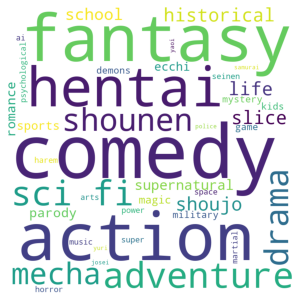

In [46]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df3.genre:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # token to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (9, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# content-based recommendation system

In [47]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}
for k,v in known_animes.items():    
    anime.loc[anime["name"]==k,"episodes"] = v
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

In [48]:
pd_type = pd.get_dummies(anime[["type"]])
pd_type.head()

,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [49]:
anime["rating"] = anime["rating"].astype(float)
anime["rating"].fillna(anime["rating"].median(),inplace = True)
anime["members"] = anime["members"].astype(float)


# Scaling
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(anime[["type"]]),
                            anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.370,200630.000,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.260,793665.000,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.250,114262.000,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.170,673572.000,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.160,151266.000,51


In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
anime_features = min_max_scaler.fit_transform(anime_features)
np.round(anime_features,2)

array([[0.  , 0.  , 0.  , ..., 0.93, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.92, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.92, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.43, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 0.  , 0.  ]])

# Fit KNN Model

In [51]:
from sklearn.neighbors import NearestNeighbors


pd_2 = pd.DataFrame(anime_features)
np.random.seed(0) 
missing_values_count = pd_2.isnull().sum()
print(missing_values_count)


nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)
distances, indices = nbrs.kneighbors(anime_features)

0     0
1     0
2     0
3     0
4     0
     ..
88    0
89    0
90    0
91    0
92    0
Length: 93, dtype: int64


In [52]:

def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]
all_anime_names = list(anime.name.values)


def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))
            
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.loc[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.loc[id]["name"])

# Recommendation

In [53]:
print_similar_animes("City Hunter")

City Hunter 2
City Hunter 3
City Hunter 039 91
Cuticle Tantei Inaba
CLAMP Gakuen Tanteidan


In [54]:
print_similar_animes(query="Naruto")

Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


In [55]:
print_similar_animes("Dragon Ball Super")

Dragon Ball Kai
Dragon Ball Kai 2014 
Dragon Ball Z
Toriko
Rekka no Honoo


# cluster

In [99]:
ms = df3.groupby(['name']).mean().reset_index()
ms['mean_rating'] = ms['rating']

ms.drop(['user_id','rating'],axis=1, inplace=True)

ms.head(10)

,name,anime_id,members,mean_rating
0,001,29978.000,916.000,4.000
1,Accelerando: Datenshi-tachi no Sasayaki,2852.000,7484.000,7.000
2,Alps no Shoujo Heidi (1979),9547.000,1480.000,7.000
3,Aoi Blink,3631.000,931.000,7.000
4,Aoi Sekai no Chuushin de,15133.000,25693.000,6.000
5,Binchou-tan,750.000,6960.000,7.000
6,Black Gate: Kanin no Gakuen,2145.000,2982.000,6.000
7,Black Jack: Sora kara Kita Kodomo,6246.000,1595.000,7.000
8,Brothers Conflict OV,25437.000,10286.000,7.000
9,Buzzer Beater 2nd Season,2684.000,5193.000,7.000


In [100]:
df4 = pd.merge(df3,ms,on=['name','anime_id'])
df4[df4['anime_id']>= 1].head(10)

,anime_id,name,genre,type,episodes,rating,members_x,user_id,members_y,mean_rating
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.000,19963,1418,19963.000,8.000
1,780,Detective Conan Movie 02: The Fourteenth Target,"Adventure, Comedy, Mystery, Police, Shounen",Movie,1,8.000,26284,415,26284.000,8.000
2,27633,Gekkan Shoujo Nozaki-kun Specials,"Comedy, Romance, School",Special,6,8.000,52672,123,52672.000,8.000
3,2321,Giant Robo the Animation: Chikyuu ga Seishi Su...,"Action, Mecha, Sci-Fi, Shounen, Super Power",OVA,7,8.000,12283,4391,12283.000,8.000
4,17273,Hetalia: The Beautiful World Specials,"Comedy, Historical, Parody",Special,4,8.000,8644,1457,8644.000,8.000
5,429,Kaleido Star: Legend of Phoenix - Layla Hamilt...,"Comedy, Drama, Shoujo",OVA,1,8.000,9268,1497,9268.000,8.000
6,18661,Kamisama Hajimemashita OV,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,2,8.000,38678,120,38678.000,8.000
7,14349,Little Witch Academi,"Adventure, Comedy, Fantasy, Magic, School",Movie,1,8.000,111703,111,111703.000,8.000
8,1729,Maria-sama ga Miteru 3rd,"Drama, School, Shoujo Ai, Slice of Life",OVA,5,8.000,12394,916,12394.000,8.000
9,31973,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space",ONA,4,8.000,14419,497,14419.000,8.000


In [58]:
df4[df4['anime_id']>= 2].head(10)

,anime_id,name,genre,type,episodes,rating,members_x,user_id,members_y,mean_rating
0,1470,City Hunter,"Action, Comedy, Mystery, Shounen",TV,51,8.000,19963,1418,19963.000,8.000
1,780,Detective Conan Movie 02: The Fourteenth Target,"Adventure, Comedy, Mystery, Police, Shounen",Movie,1,8.000,26284,415,26284.000,8.000
2,27633,Gekkan Shoujo Nozaki-kun Specials,"Comedy, Romance, School",Special,6,8.000,52672,123,52672.000,8.000
3,2321,Giant Robo the Animation: Chikyuu ga Seishi Su...,"Action, Mecha, Sci-Fi, Shounen, Super Power",OVA,7,8.000,12283,4391,12283.000,8.000
4,17273,Hetalia: The Beautiful World Specials,"Comedy, Historical, Parody",Special,4,8.000,8644,1457,8644.000,8.000
5,429,Kaleido Star: Legend of Phoenix - Layla Hamilt...,"Comedy, Drama, Shoujo",OVA,1,8.000,9268,1497,9268.000,8.000
6,18661,Kamisama Hajimemashita OV,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,2,8.000,38678,120,38678.000,8.000
7,14349,Little Witch Academi,"Adventure, Comedy, Fantasy, Magic, School",Movie,1,8.000,111703,111,111703.000,8.000
8,1729,Maria-sama ga Miteru 3rd,"Drama, School, Shoujo Ai, Slice of Life",OVA,5,8.000,12394,916,12394.000,8.000
9,31973,Mobile Suit Gundam Thunderbolt,"Action, Drama, Mecha, Military, Sci-Fi, Space",ONA,4,8.000,14419,497,14419.000,8.000


In [59]:
df4 = df4.rename({'anime_id':'anime'}, axis='columns')

In [60]:
df5 = pd.crosstab(df4['anime'], df4['name'])
df5.head(10)

name,001,Accelerando: Datenshi-tachi no Sasayaki,Alps no Shoujo Heidi (1979),Aoi Blink,Aoi Sekai no Chuushin de,Binchou-tan,Black Gate: Kanin no Gakuen,Black Jack: Sora kara Kita Kodomo,Brothers Conflict OV,Buzzer Beater 2nd Season,...,The Epic Of ZektBach,The Everlasting Guilty Crown,Tokubetsu Jugyou 3 SLG The Animation,Tonari no Oneesan,Tsurupika Hagemaru-kun,U,Vicious,Wellber no Monogatari: Sisters of Wellber Zwei,Xiao Yeyou,Yakyuubu Aruaru
anime,,,,,,,,,,,,,,,,,,,,,
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df5.shape

(83, 83)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df5)
pca_samples = pca.transform(df5)

In [63]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-0.003,-0.001,0.004
1,-0.036,0.024,0.014
2,-0.029,-0.038,-0.133
3,0.087,-0.059,0.036
4,0.023,0.008,0.112


In [64]:
tocluster = pd.DataFrame(ps[[0,1,2]])

C:\Users\noraa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  import sys


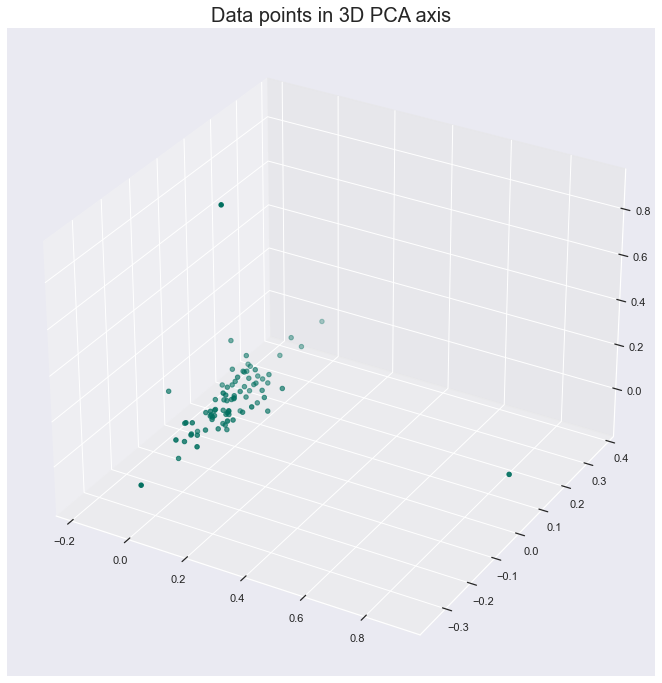

In [65]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

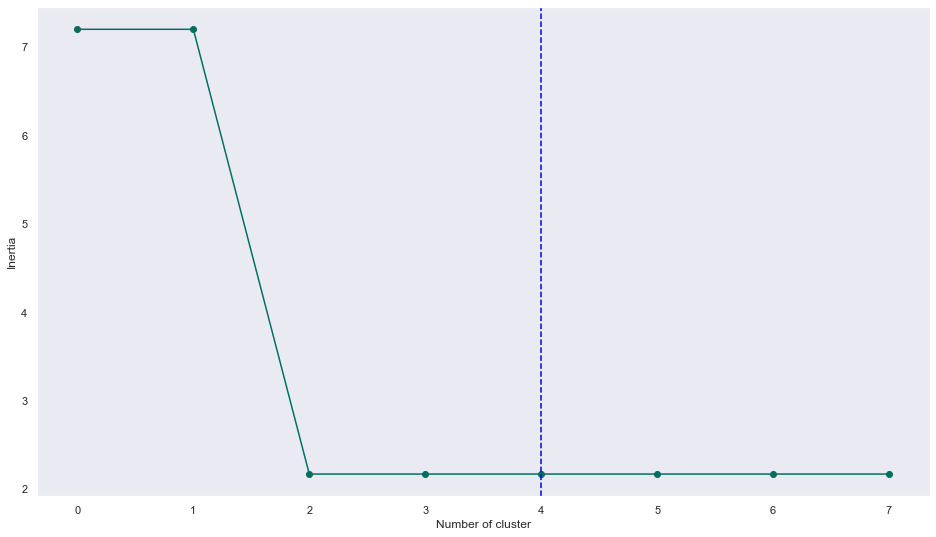

In [67]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

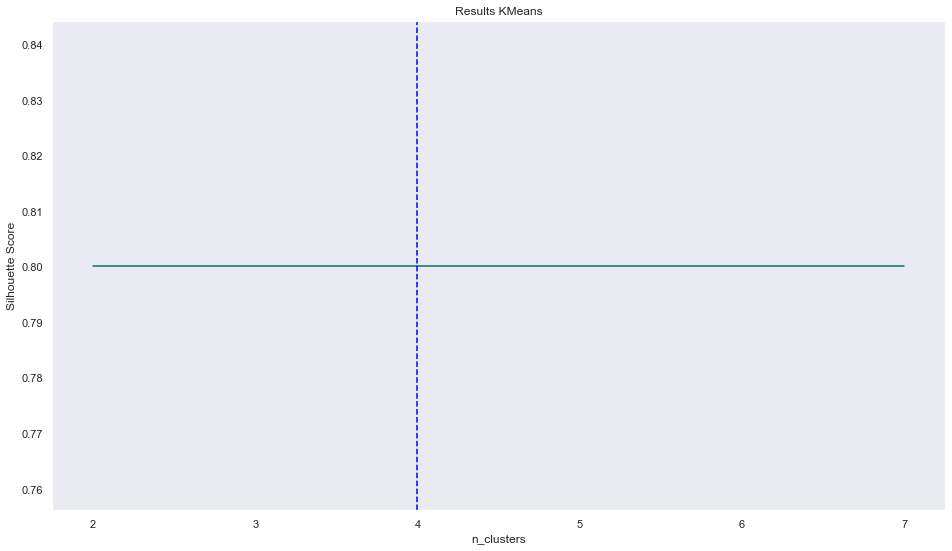

In [68]:

plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [69]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=3,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.12090387e-02 -1.05261796e-02 -1.71992209e-04]
 [ 9.01464250e-01 -4.37967601e-02  5.53764363e-02]
 [ 6.46788184e-03  8.96417308e-01 -4.14450673e-02]]


C:\Users\noraa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


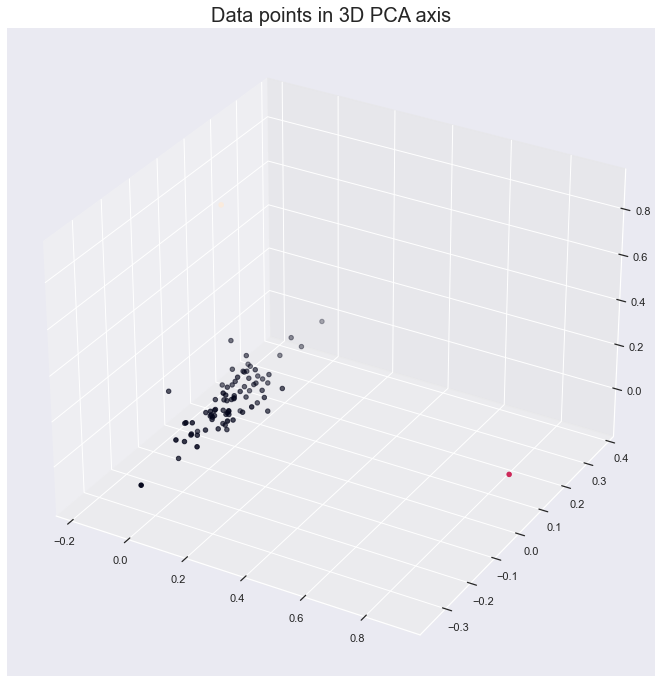

In [70]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

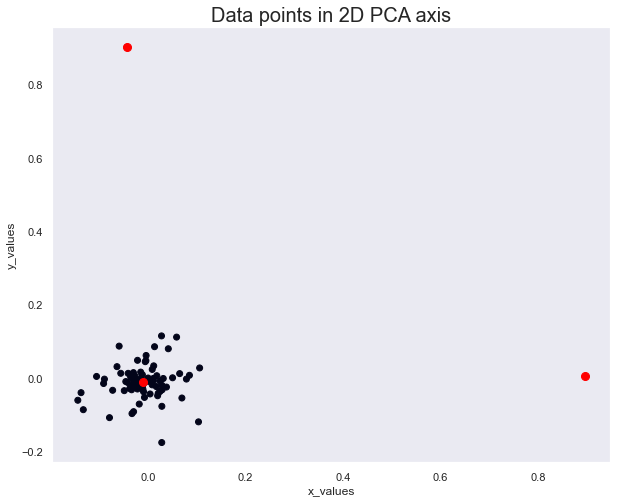

In [71]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [72]:
df5['cluster'] = c_preds
df5.head(10)

name,001,Accelerando: Datenshi-tachi no Sasayaki,Alps no Shoujo Heidi (1979),Aoi Blink,Aoi Sekai no Chuushin de,Binchou-tan,Black Gate: Kanin no Gakuen,Black Jack: Sora kara Kita Kodomo,Brothers Conflict OV,Buzzer Beater 2nd Season,...,The Everlasting Guilty Crown,Tokubetsu Jugyou 3 SLG The Animation,Tonari no Oneesan,Tsurupika Hagemaru-kun,U,Vicious,Wellber no Monogatari: Sisters of Wellber Zwei,Xiao Yeyou,Yakyuubu Aruaru,cluster
anime,,,,,,,,,,,,,,,,,,,,,
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 124 to 33546
Data columns (total 84 columns):
 #   Column                                                       Non-Null Count  Dtype
---  ------                                                       --------------  -----
 0   001                                                          83 non-null     int64
 1   Accelerando: Datenshi-tachi no Sasayaki                      83 non-null     int64
 2   Alps no Shoujo Heidi (1979)                                  83 non-null     int64
 3   Aoi Blink                                                    83 non-null     int64
 4   Aoi Sekai no Chuushin de                                     83 non-null     int64
 5   Binchou-tan                                                  83 non-null     int64
 6   Black Gate: Kanin no Gakuen                                  83 non-null     int64
 7   Black Jack: Sora kara Kita Kodomo                            83 non-null     int64
 8   Brother

In [74]:
c0 = df5[df5['cluster']==0].drop('cluster',axis=1).mean()
c1 = df5[df5['cluster']==1].drop('cluster',axis=1).mean()
c2 = df5[df5['cluster']==2].drop('cluster',axis=1).mean()
c3 = df5[df5['cluster']==3].drop('cluster',axis=1).mean()

In [75]:
c0.sort_values(ascending=False)[0:15]

name
001                                       0.012
Shin Onimusha: Dawn of Dreams the Story   0.012
Sex Pistols                               0.012
Sekai de Ichiban Tsuyoku Naritai!         0.012
Sekai Kei Sekai Ron                       0.012
Schwarzesmarken                           0.012
Samurai Flamenco                          0.012
Rio: Rainbow Gate!                        0.012
Recorder to Randoseru Re♪                 0.012
Planet:Valkyrie                           0.012
Papillon Rose                             0.012
Oyome-sama Honey Days♥                    0.012
Overman King Gainer                       0.012
Nanairo Kakumei                           0.012
Monster Strike: Mermaid Rhapsody          0.012
dtype: float64

In [76]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [77]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [78]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [79]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  
    set_keywords = set_keywords.union(liste_keywords)

In [80]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False,)
        
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

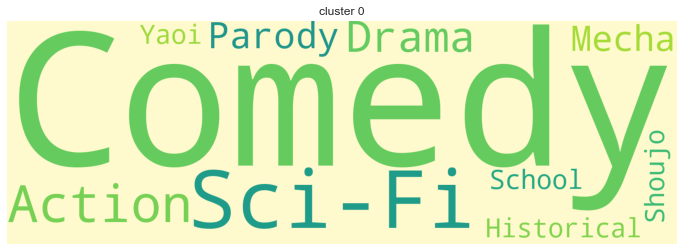

In [81]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [82]:
keyword_occurences[0:5]

[['Comedy', 4], [' Sci-Fi', 3], ['Action', 3], [' Drama', 2], [' Parody', 2]]

In [83]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 9.125
AVG movie rating : 6.125
AVG member : 19030.75


In [84]:
c1.sort_values(ascending=False)[0:15]

name
Choujuu Kishin Dancougar: Juusenki-tai Songs   1.000
001                                            0.000
Planet:Valkyrie                                0.000
Sex Pistols                                    0.000
Sekai de Ichiban Tsuyoku Naritai!              0.000
Sekai Kei Sekai Ron                            0.000
Schwarzesmarken                                0.000
Samurai Flamenco                               0.000
Rio: Rainbow Gate!                             0.000
Recorder to Randoseru Re♪                      0.000
Papillon Rose                                  0.000
Shin Onimusha: Dawn of Dreams the Story        0.000
Oyome-sama Honey Days♥                         0.000
Overman King Gainer                            0.000
Nanairo Kakumei                                0.000
dtype: float64

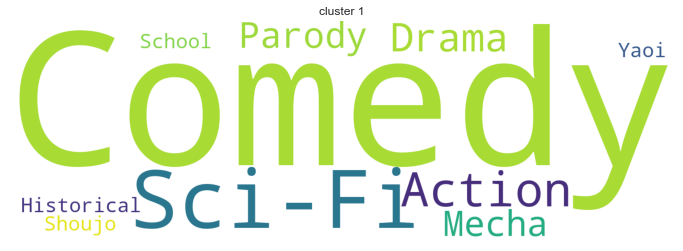

In [85]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [86]:
keyword_occurences[0:5]

[['Comedy', 4], [' Sci-Fi', 3], ['Action', 3], [' Drama', 2], [' Parody', 2]]

In [87]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 9.125
AVG movie rating : 6.125
AVG member : 19030.75


In [88]:
c2.sort_values(ascending=False)[0:15]

name
Heisei Jogakuen Kagai Lesson        1.000
001                                 0.000
Planet:Valkyrie                     0.000
Sex Pistols                         0.000
Sekai de Ichiban Tsuyoku Naritai!   0.000
Sekai Kei Sekai Ron                 0.000
Schwarzesmarken                     0.000
Samurai Flamenco                    0.000
Rio: Rainbow Gate!                  0.000
Recorder to Randoseru Re♪           0.000
Papillon Rose                       0.000
Maria-sama ga Miteru 3rd            0.000
Oyome-sama Honey Days♥              0.000
Overman King Gainer                 0.000
Nanairo Kakumei                     0.000
dtype: float64

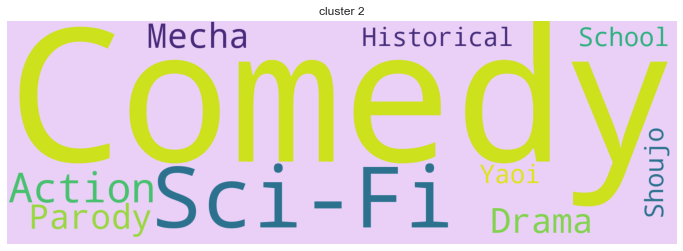

In [89]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","#EAD0F7")

In [90]:
keyword_occurences[0:5]

[['Comedy', 4], [' Sci-Fi', 3], ['Action', 3], [' Drama', 2], [' Parody', 2]]

In [91]:
c2_data['episode'].mean()

8.222222222222221

In [92]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 8.222222222222221
AVG movie rating : 6.0
AVG member : 16972.11111111111


In [93]:
c3.sort_values(ascending=False)[0:15]

name
001                                                NaN
Accelerando: Datenshi-tachi no Sasayaki            NaN
Alps no Shoujo Heidi (1979)                        NaN
Aoi Blink                                          NaN
Aoi Sekai no Chuushin de                           NaN
Binchou-tan                                        NaN
Black Gate: Kanin no Gakuen                        NaN
Black Jack: Sora kara Kita Kodomo                  NaN
Brothers Conflict OV                               NaN
Buzzer Beater 2nd Season                           NaN
Captain Tsubasa: Sekai Daikessen!! Jr. World Cup   NaN
Cartagra: Tsuki Gurui no Yamai                     NaN
Cheer Danshi!!                                     NaN
Choujuu Kishin Dancougar: Juusenki-tai Songs       NaN
City Hunter                                        NaN
dtype: float64

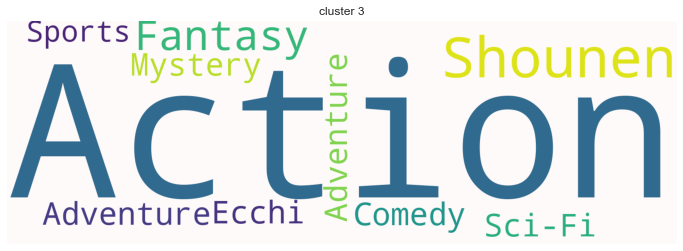

In [94]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [95]:
keyword_occurences[0:5]

[['Action', 3],
 [' Shounen', 3],
 [' Fantasy', 2],
 [' Sci-Fi', 1],
 [' Mystery', 1]]

In [96]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 21.4
AVG movie rating : 6.4
AVG member : 10539.2


In [97]:
# normalization

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler scaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df5)
print(scaled)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [98]:
#standardization

from numpy import asarray

# standard scaler
scaler2 = StandardScaler()

scaled = scaler.fit_transform(df5)
print(scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
